In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
df.drop('customerID', axis = 'columns' , inplace = True)

In [78]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [79]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [80]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()
## we use errors = 'coerce' as there were few spaces in between.
## isnull() for the rows with no values of Totalcharges

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [81]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [82]:
df.shape

(7043, 20)

In [83]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [84]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [85]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [86]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [87]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [88]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [89]:
df1[df1.Churn=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


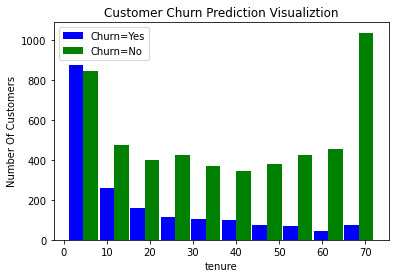

In [90]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [91]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtype=='object':
            print(f"{columns}: {df[columns].unique()}")

In [92]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [93]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'NO', inplace= True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [94]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['NO' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [95]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [96]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [97]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: ['NO' 0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [98]:
df1['gender'].replace({'Female' : 1, "Male":0}, inplace = True)

In [99]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [100]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [101]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
77,1,0,1,1,8,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4881,0,0,1,0,28,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
779,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
535,0,0,0,0,12,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2269,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [102]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                               object
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [103]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [104]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: ['NO' 0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSuppo

In [105]:
df2['MultipleLines'].replace({'NO' : 0}, inplace = True)

In [106]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [107]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=5)


In [108]:
x_train.shape

(5625, 26)

In [109]:
x_test.shape

(1407, 26)

In [110]:
## Neural Network

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
176/176 [==============================] - 1s 837us/step - loss: 0.4931 - accuracy: 0.7493
Epoch 2/100
176/176 [==============================] - 0s 868us/step - loss: 0.4262 - accuracy: 0.7957
Epoch 3/100
176/176 [==============================] - 0s 854us/step - loss: 0.4197 - accuracy: 0.8012
Epoch 4/100
176/176 [==============================] - 0s 890us/step - loss: 0.4152 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 0s 916us/step - loss: 0.4130 - accuracy: 0.8064
Epoch 6/100
176/176 [==============================] - 0s 855us/step - loss: 0.4099 - accuracy: 0.8101
Epoch 7/100
176/176 [==============================] - 0s 855us/step - loss: 0.4094 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 0s 843us/step - loss: 0.4067 - accuracy: 0.8096
Epoch 9/100
176/176 [==============================] - 0s 847us/step - loss: 0.4056 - accuracy: 0.8087
Epoch 10/100
176/176 [==============================] - 0s 857us/step - l

176/176 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8297
Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8311
Epoch 82/100
176/176 [==============================] - 0s 819us/step - loss: 0.3539 - accuracy: 0.8334
Epoch 83/100
176/176 [==============================] - 0s 871us/step - loss: 0.3535 - accuracy: 0.8304
Epoch 84/100
176/176 [==============================] - 0s 835us/step - loss: 0.3525 - accuracy: 0.8315
Epoch 85/100
176/176 [==============================] - 0s 834us/step - loss: 0.3519 - accuracy: 0.8357
Epoch 86/100
176/176 [==============================] - 0s 832us/step - loss: 0.3521 - accuracy: 0.83130s - loss: 0.3457 - accuracy: 0.83
Epoch 87/100
176/176 [==============================] - 0s 822us/step - loss: 0.3522 - accuracy: 0.8336
Epoch 88/100
176/176 [==============================] - 0s 890us/step - loss: 0.3507 - accuracy: 0.8336
Epoch 89/100
176/176 [=========================

In [113]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
176/176 [==============================] - 0s 810us/step - loss: 0.5275 - accuracy: 0.7442
Epoch 2/1000
176/176 [==============================] - 0s 843us/step - loss: 0.4310 - accuracy: 0.7899
Epoch 3/1000
176/176 [==============================] - 0s 852us/step - loss: 0.4219 - accuracy: 0.7947
Epoch 4/1000
176/176 [==============================] - 0s 851us/step - loss: 0.4173 - accuracy: 0.8016
Epoch 5/1000
176/176 [==============================] - 0s 859us/step - loss: 0.4142 - accuracy: 0.8016
Epoch 6/1000
176/176 [==============================] - 0s 874us/step - loss: 0.4133 - accuracy: 0.8025
Epoch 7/1000
176/176 [==============================] - 0s 861us/step - loss: 0.4102 - accuracy: 0.8053
Epoch 8/1000
176/176 [==============================] - 0s 849us/step - loss: 0.4082 - accuracy: 0.8073
Epoch 9/1000
176/176 [==============================] - 0s 847us/step - loss: 0.4062 - accuracy: 0.8080
Epoch 10/1000
176/176 [==============================] - 0s 855u

176/176 [==============================] - 0s 837us/step - loss: 0.3617 - accuracy: 0.8299
Epoch 79/1000
176/176 [==============================] - 0s 836us/step - loss: 0.3637 - accuracy: 0.8329
Epoch 80/1000
176/176 [==============================] - 0s 826us/step - loss: 0.3626 - accuracy: 0.8320
Epoch 81/1000
176/176 [==============================] - 0s 850us/step - loss: 0.3605 - accuracy: 0.8364
Epoch 82/1000
176/176 [==============================] - 0s 849us/step - loss: 0.3608 - accuracy: 0.8329
Epoch 83/1000
176/176 [==============================] - 0s 845us/step - loss: 0.3607 - accuracy: 0.8354
Epoch 84/1000
176/176 [==============================] - 0s 844us/step - loss: 0.3607 - accuracy: 0.8332
Epoch 85/1000
176/176 [==============================] - 0s 839us/step - loss: 0.3598 - accuracy: 0.8347
Epoch 86/1000
176/176 [==============================] - 0s 821us/step - loss: 0.3596 - accuracy: 0.8359
Epoch 87/1000
176/176 [==============================] - 0s 837us/ste

176/176 [==============================] - 0s 835us/step - loss: 0.3398 - accuracy: 0.8446
Epoch 154/1000
176/176 [==============================] - 0s 843us/step - loss: 0.3388 - accuracy: 0.8475
Epoch 155/1000
176/176 [==============================] - 0s 845us/step - loss: 0.3384 - accuracy: 0.8453
Epoch 156/1000
176/176 [==============================] - 0s 846us/step - loss: 0.3381 - accuracy: 0.8455
Epoch 157/1000
176/176 [==============================] - 0s 822us/step - loss: 0.3386 - accuracy: 0.8482
Epoch 158/1000
176/176 [==============================] - 0s 822us/step - loss: 0.3387 - accuracy: 0.8471
Epoch 159/1000
176/176 [==============================] - 0s 831us/step - loss: 0.3386 - accuracy: 0.8452
Epoch 160/1000
176/176 [==============================] - ETA: 0s - loss: 0.3387 - accuracy: 0.84 - 0s 826us/step - loss: 0.3373 - accuracy: 0.8459
Epoch 161/1000
176/176 [==============================] - 0s 826us/step - loss: 0.3388 - accuracy: 0.8457
Epoch 162/1000
176/

176/176 [==============================] - 0s 836us/step - loss: 0.3242 - accuracy: 0.8516
Epoch 229/1000
176/176 [==============================] - 0s 854us/step - loss: 0.3258 - accuracy: 0.8510
Epoch 230/1000
176/176 [==============================] - 0s 816us/step - loss: 0.3242 - accuracy: 0.8551
Epoch 231/1000
176/176 [==============================] - 0s 830us/step - loss: 0.3260 - accuracy: 0.8514
Epoch 232/1000
176/176 [==============================] - 0s 834us/step - loss: 0.3238 - accuracy: 0.8507
Epoch 233/1000
176/176 [==============================] - 0s 823us/step - loss: 0.3253 - accuracy: 0.8516
Epoch 234/1000
176/176 [==============================] - 0s 831us/step - loss: 0.3240 - accuracy: 0.8500
Epoch 235/1000
176/176 [==============================] - 0s 821us/step - loss: 0.3240 - accuracy: 0.8532
Epoch 236/1000
176/176 [==============================] - 0s 825us/step - loss: 0.3236 - accuracy: 0.8523
Epoch 237/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 834us/step - loss: 0.3102 - accuracy: 0.8562
Epoch 305/1000
176/176 [==============================] - 0s 830us/step - loss: 0.3116 - accuracy: 0.8601
Epoch 306/1000
176/176 [==============================] - 0s 844us/step - loss: 0.3119 - accuracy: 0.8581
Epoch 307/1000
176/176 [==============================] - 0s 858us/step - loss: 0.3118 - accuracy: 0.8583
Epoch 308/1000
176/176 [==============================] - 0s 824us/step - loss: 0.3117 - accuracy: 0.8587
Epoch 309/1000
176/176 [==============================] - ETA: 0s - loss: 0.3164 - accuracy: 0.85 - 0s 818us/step - loss: 0.3117 - accuracy: 0.8597
Epoch 310/1000
176/176 [==============================] - 0s 833us/step - loss: 0.3105 - accuracy: 0.8587
Epoch 311/1000
176/176 [==============================] - 0s 820us/step - loss: 0.3108 - accuracy: 0.85800s - loss: 0.3110 - accuracy: 0.85
Epoch 312/1000
176/176 [==============================] - 0s 859us/step - loss: 0.3106 - ac

176/176 [==============================] - 0s 831us/step - loss: 0.3009 - accuracy: 0.8670
Epoch 380/1000
176/176 [==============================] - 0s 841us/step - loss: 0.3021 - accuracy: 0.8633
Epoch 381/1000
176/176 [==============================] - 0s 835us/step - loss: 0.3026 - accuracy: 0.8617
Epoch 382/1000
176/176 [==============================] - 0s 825us/step - loss: 0.3025 - accuracy: 0.8631
Epoch 383/1000
176/176 [==============================] - 0s 847us/step - loss: 0.3036 - accuracy: 0.8585
Epoch 384/1000
176/176 [==============================] - 0s 863us/step - loss: 0.3003 - accuracy: 0.8644
Epoch 385/1000
176/176 [==============================] - 0s 833us/step - loss: 0.3021 - accuracy: 0.8601
Epoch 386/1000
176/176 [==============================] - 0s 835us/step - loss: 0.3005 - accuracy: 0.8652
Epoch 387/1000
176/176 [==============================] - 0s 841us/step - loss: 0.3006 - accuracy: 0.8594
Epoch 388/1000
176/176 [==============================] - ETA

176/176 [==============================] - 0s 851us/step - loss: 0.2948 - accuracy: 0.8670
Epoch 455/1000
176/176 [==============================] - 0s 839us/step - loss: 0.2931 - accuracy: 0.8652
Epoch 456/1000
176/176 [==============================] - 0s 830us/step - loss: 0.2924 - accuracy: 0.8674
Epoch 457/1000
176/176 [==============================] - 0s 823us/step - loss: 0.2937 - accuracy: 0.8656
Epoch 458/1000
176/176 [==============================] - 0s 813us/step - loss: 0.2934 - accuracy: 0.8661
Epoch 459/1000
176/176 [==============================] - 0s 842us/step - loss: 0.2924 - accuracy: 0.8688
Epoch 460/1000
176/176 [==============================] - 0s 861us/step - loss: 0.2918 - accuracy: 0.8686
Epoch 461/1000
176/176 [==============================] - 0s 847us/step - loss: 0.2914 - accuracy: 0.8676
Epoch 462/1000
176/176 [==============================] - 0s 839us/step - loss: 0.2903 - accuracy: 0.8670
Epoch 463/1000
176/176 [==============================] - 0s 

176/176 [==============================] - ETA: 0s - loss: 0.2919 - accuracy: 0.86 - 0s 844us/step - loss: 0.2850 - accuracy: 0.8709
Epoch 530/1000
176/176 [==============================] - 0s 843us/step - loss: 0.2837 - accuracy: 0.8745
Epoch 531/1000
176/176 [==============================] - 0s 859us/step - loss: 0.2831 - accuracy: 0.8695
Epoch 532/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.8706
Epoch 533/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.8695
Epoch 534/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.8688
Epoch 535/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8683
Epoch 536/1000
176/176 [==============================] - ETA: 0s - loss: 0.2860 - accuracy: 0.86 - 0s 1ms/step - loss: 0.2836 - accuracy: 0.8661
Epoch 537/1000
176/176 [==============================] - 0s 817us/step - loss: 0.2832 - accu

176/176 [==============================] - 0s 850us/step - loss: 0.2769 - accuracy: 0.8724
Epoch 605/1000
176/176 [==============================] - 0s 810us/step - loss: 0.2782 - accuracy: 0.8713
Epoch 606/1000
176/176 [==============================] - 0s 870us/step - loss: 0.2796 - accuracy: 0.8722
Epoch 607/1000
176/176 [==============================] - 0s 823us/step - loss: 0.2770 - accuracy: 0.8734
Epoch 608/1000
176/176 [==============================] - 0s 872us/step - loss: 0.2771 - accuracy: 0.8736
Epoch 609/1000
176/176 [==============================] - 0s 811us/step - loss: 0.2783 - accuracy: 0.8720
Epoch 610/1000
176/176 [==============================] - 0s 835us/step - loss: 0.2770 - accuracy: 0.8741
Epoch 611/1000
176/176 [==============================] - 0s 829us/step - loss: 0.2788 - accuracy: 0.8718
Epoch 612/1000
176/176 [==============================] - 0s 836us/step - loss: 0.2784 - accuracy: 0.8715
Epoch 613/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 826us/step - loss: 0.2741 - accuracy: 0.8743
Epoch 680/1000
176/176 [==============================] - 0s 838us/step - loss: 0.2748 - accuracy: 0.8709
Epoch 681/1000
176/176 [==============================] - 0s 836us/step - loss: 0.2742 - accuracy: 0.8713
Epoch 682/1000
176/176 [==============================] - 0s 857us/step - loss: 0.2741 - accuracy: 0.8725
Epoch 683/1000
176/176 [==============================] - 0s 823us/step - loss: 0.2749 - accuracy: 0.8709
Epoch 684/1000
176/176 [==============================] - 0s 844us/step - loss: 0.2733 - accuracy: 0.8748
Epoch 685/1000
176/176 [==============================] - 0s 825us/step - loss: 0.2745 - accuracy: 0.8766
Epoch 686/1000
176/176 [==============================] - 0s 819us/step - loss: 0.2721 - accuracy: 0.8761
Epoch 687/1000
176/176 [==============================] - 0s 808us/step - loss: 0.2720 - accuracy: 0.8757
Epoch 688/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 831us/step - loss: 0.2683 - accuracy: 0.8780
Epoch 756/1000
176/176 [==============================] - 0s 839us/step - loss: 0.2704 - accuracy: 0.8772
Epoch 757/1000
176/176 [==============================] - 0s 835us/step - loss: 0.2679 - accuracy: 0.8795
Epoch 758/1000
176/176 [==============================] - 0s 843us/step - loss: 0.2683 - accuracy: 0.8763
Epoch 759/1000
176/176 [==============================] - 0s 827us/step - loss: 0.2675 - accuracy: 0.8741
Epoch 760/1000
176/176 [==============================] - 0s 834us/step - loss: 0.2674 - accuracy: 0.8772
Epoch 761/1000
176/176 [==============================] - 0s 839us/step - loss: 0.2696 - accuracy: 0.8750
Epoch 762/1000
176/176 [==============================] - 0s 827us/step - loss: 0.2679 - accuracy: 0.8738
Epoch 763/1000
176/176 [==============================] - 0s 831us/step - loss: 0.2686 - accuracy: 0.87340s - loss: 0.2710 - accuracy: 0.87
Epoch 764/1000
176/176 [===

176/176 [==============================] - 0s 847us/step - loss: 0.2656 - accuracy: 0.8768
Epoch 831/1000
176/176 [==============================] - 0s 847us/step - loss: 0.2651 - accuracy: 0.8789
Epoch 832/1000
176/176 [==============================] - 0s 841us/step - loss: 0.2650 - accuracy: 0.8766
Epoch 833/1000
176/176 [==============================] - 0s 852us/step - loss: 0.2642 - accuracy: 0.8782
Epoch 834/1000
176/176 [==============================] - 0s 835us/step - loss: 0.2680 - accuracy: 0.8754
Epoch 835/1000
176/176 [==============================] - 0s 855us/step - loss: 0.2645 - accuracy: 0.8777
Epoch 836/1000
176/176 [==============================] - 0s 854us/step - loss: 0.2642 - accuracy: 0.8798
Epoch 837/1000
176/176 [==============================] - 0s 849us/step - loss: 0.2640 - accuracy: 0.8805
Epoch 838/1000
176/176 [==============================] - 0s 858us/step - loss: 0.2637 - accuracy: 0.8789
Epoch 839/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 849us/step - loss: 0.2625 - accuracy: 0.8800
Epoch 906/1000
176/176 [==============================] - 0s 853us/step - loss: 0.2615 - accuracy: 0.8804
Epoch 907/1000
176/176 [==============================] - 0s 831us/step - loss: 0.2622 - accuracy: 0.8773
Epoch 908/1000
176/176 [==============================] - 0s 836us/step - loss: 0.2605 - accuracy: 0.8805
Epoch 909/1000
176/176 [==============================] - 0s 841us/step - loss: 0.2601 - accuracy: 0.8809
Epoch 910/1000
176/176 [==============================] - 0s 845us/step - loss: 0.2630 - accuracy: 0.8780
Epoch 911/1000
176/176 [==============================] - 0s 834us/step - loss: 0.2610 - accuracy: 0.8812
Epoch 912/1000
176/176 [==============================] - 0s 845us/step - loss: 0.2616 - accuracy: 0.8828
Epoch 913/1000
176/176 [==============================] - 0s 840us/step - loss: 0.2592 - accuracy: 0.8823
Epoch 914/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 847us/step - loss: 0.2566 - accuracy: 0.8818
Epoch 982/1000
176/176 [==============================] - 0s 840us/step - loss: 0.2581 - accuracy: 0.8818
Epoch 983/1000
176/176 [==============================] - 0s 812us/step - loss: 0.2578 - accuracy: 0.8807
Epoch 984/1000
176/176 [==============================] - 0s 853us/step - loss: 0.2575 - accuracy: 0.8827
Epoch 985/1000
176/176 [==============================] - 0s 846us/step - loss: 0.2567 - accuracy: 0.8841
Epoch 986/1000
176/176 [==============================] - 0s 826us/step - loss: 0.2578 - accuracy: 0.8814
Epoch 987/1000
176/176 [==============================] - 0s 843us/step - loss: 0.2583 - accuracy: 0.8798
Epoch 988/1000
176/176 [==============================] - 0s 855us/step - loss: 0.2574 - accuracy: 0.8793
Epoch 989/1000
176/176 [==============================] - 0s 844us/step - loss: 0.2575 - accuracy: 0.8828
Epoch 990/1000
176/176 [==============================] - 0s 

In [128]:
yp = model.predict(x_test)
yp[:5]

array([[0.00910008],
       [0.6400962 ],
       [0.0035986 ],
       [0.91895235],
       [0.05987838]], dtype=float32)

In [129]:
y_test[:5]

range(0, 5)

In [130]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [131]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

In [127]:
y_test

range(0, 10)